In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split


In [1]:
pip install tslearn 
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

SyntaxError: ignored

In [3]:
ds = pd.read_csv("/content/Modelar_UH2022_agg.txt", sep='|')
ds['SAMPLETIME'] = pd.to_datetime(ds['SAMPLETIME'], infer_datetime_format=True)  
ds = ds.sort_values(by=['ID', 'SAMPLETIME'])

In [151]:
ts = []
ids = []

for serie in ds['ID'].unique():
    if serie% 20 == 0 :print('reading serie:'+ str(serie))
    
    serie_samples = pd.Series(data=np.zeros(365),index=ds['SAMPLETIME'].unique())
    sample = ds.loc[ds['ID'] == serie, 'DELTA']
    sample.index = ds.loc[ds['ID'] == serie, 'SAMPLETIME']
    serie_samples.loc[ds.loc[(ds['ID'] == serie), 'SAMPLETIME']] = sample
    ts.append(serie_samples)
    ids.append(serie)

ts = np.array(ts).T

reading serie:0
reading serie:20
reading serie:40
reading serie:60
reading serie:80
reading serie:100
reading serie:120
reading serie:140
reading serie:160
reading serie:180
reading serie:200
reading serie:220
reading serie:240
reading serie:260
reading serie:280
reading serie:300
reading serie:320
reading serie:340
reading serie:360
reading serie:380
reading serie:400
reading serie:420
reading serie:440
reading serie:460
reading serie:480
reading serie:500
reading serie:520
reading serie:540
reading serie:560
reading serie:580
reading serie:600
reading serie:620
reading serie:640
reading serie:660
reading serie:680
reading serie:700
reading serie:720
reading serie:740
reading serie:760
reading serie:780
reading serie:800
reading serie:820
reading serie:840
reading serie:860
reading serie:880
reading serie:900
reading serie:920
reading serie:940
reading serie:960
reading serie:980
reading serie:1000
reading serie:1020
reading serie:1040
reading serie:1060
reading serie:1080
reading ser

In [152]:
df = pd.DataFrame(ts)

muestra = df.iloc[:,0]
scaler = [np.max(muestra), np.min(muestra)]
muestra = (np.array(muestra)-scaler[1])/(scaler[0]-scaler[1])
df.iloc[:,0] = muestra

train = muestra[0:330]
valid = muestra[330:]

# Model

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers import LSTM
import tensorflow as tf

In [209]:
weights = np.exp((np.arange(30)-30)/10)
weights

array([0.04978707, 0.05502322, 0.06081006, 0.06720551, 0.07427358,
       0.082085  , 0.09071795, 0.10025884, 0.11080316, 0.12245643,
       0.13533528, 0.14956862, 0.16529889, 0.18268352, 0.20189652,
       0.22313016, 0.24659696, 0.27253179, 0.30119421, 0.33287108,
       0.36787944, 0.40656966, 0.44932896, 0.4965853 , 0.54881164,
       0.60653066, 0.67032005, 0.74081822, 0.81873075, 0.90483742])

In [211]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(df.iloc[i-30:i,0]*weights)
    y_train.append(df.iloc[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [215]:
model = Sequential([
                LSTM(256,input_shape= (x_train.shape[1],1), return_sequences=True, use_bias=True),
                    
                # Lambda(lambda x: x[:, -366:, :]),
                Dense(units=1)
            ])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f2b283fd6d0>>

In [213]:
inputs = df.iloc[(len(df.iloc[:,0]) - len(valid) - 30):,0].values
inputs = inputs.reshape(-1,1)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0]*weights)
X_test = np.array(X_test)
y_test = valid
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


In [65]:
X_test.shape

(35, 60, 1)

In [227]:
model.fit(x_train,y_train,validation_data=(X_test, y_test),epochs=50)

Epoch 1/50
9/9 [==============================] - 1s 122ms/step - loss: 0.0353 - val_loss: 0.0222
Epoch 2/50
9/9 [==============================] - 1s 108ms/step - loss: 0.0359 - val_loss: 0.0213
Epoch 3/50
9/9 [==============================] - 1s 107ms/step - loss: 0.0354 - val_loss: 0.0250
Epoch 4/50
9/9 [==============================] - 1s 102ms/step - loss: 0.0356 - val_loss: 0.0207
Epoch 5/50
9/9 [==============================] - 1s 102ms/step - loss: 0.0352 - val_loss: 0.0220
Epoch 6/50
9/9 [==============================] - 1s 108ms/step - loss: 0.0353 - val_loss: 0.0219
Epoch 7/50
9/9 [==============================] - 1s 133ms/step - loss: 0.0351 - val_loss: 0.0217
Epoch 8/50
9/9 [==============================] - 1s 151ms/step - loss: 0.0352 - val_loss: 0.0212
Epoch 9/50
9/9 [==============================] - 1s 105ms/step - loss: 0.0352 - val_loss: 0.0217
Epoch 10/50
9/9 [==============================] - 1s 104ms/step - loss: 0.0351 - val_loss: 0.0214
Epoch 11/50
9/9 [==

In [217]:
consumption_pred = model.predict(X_test)

In [171]:
y_train.shape

(270,)

# Resultados

In [127]:
valid = valid*(scaler[0]-scaler[1])+scaler[1]
consumption_pred = consumption_pred*(scaler[0]-scaler[1])+scaler[1]
train = train*(scaler[0]-scaler[1])+scaler[1]


print(rmse)

TypeError: ignored

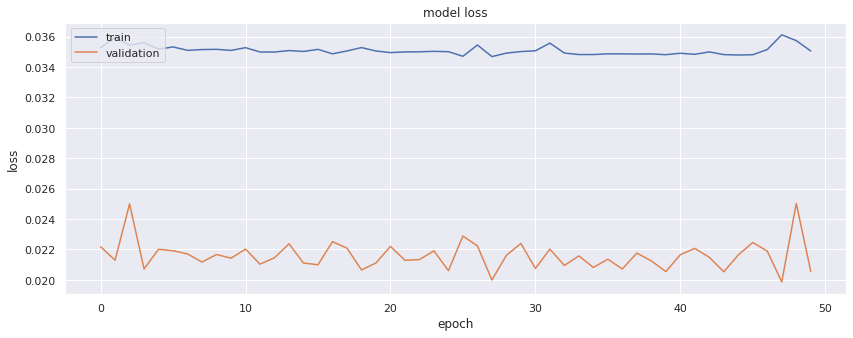

In [228]:
history = model

sns.set_theme()
plt.figure(figsize=(14,5))
# "Loss"
plt.plot(history.history.history['loss'])
plt.plot(history.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


In [219]:
model.history.history

{}

In [37]:
X_test.shape

(260905, 60)

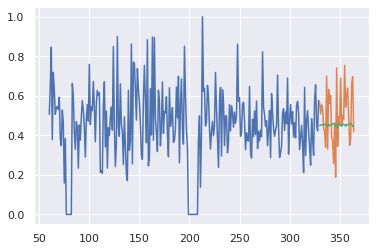

In [226]:
fig = plt.figure()
plt.plot(np.arange(60,330),y_train)
plt.plot(np.arange(330,365),y_test)
plt.plot(np.arange(330,365),consumption_pred.reshape([35,30])[:,-1])